In [22]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Dropping PassengerId,Name,Ticket,Fare,Cabin columns**

In [25]:
columns_to_drop=["PassengerId","Name","Ticket","Fare","Cabin"]
df.drop(columns_to_drop,axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


**Age ---> 714 non-null**

Age Columns has some missing values so i have filled them with mode

In [27]:
# Import the necessary libraries
import pandas as pd

# Assuming 'df' is your DataFrame
mode_age = df['Age'].mode()[0]

# Fill missing values with the mode
df['Age'].fillna(mode_age, inplace=True)


In [28]:
from sklearn.preprocessing import LabelEncoder
# labe encoding for "Sex" feature
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

#one hot encoding for "Embarked" feature
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Embarked'])


In [29]:
data=df

**Since we are doing binary classification I will be using Logistic Regression**

Accuracy: 0.8100558659217877


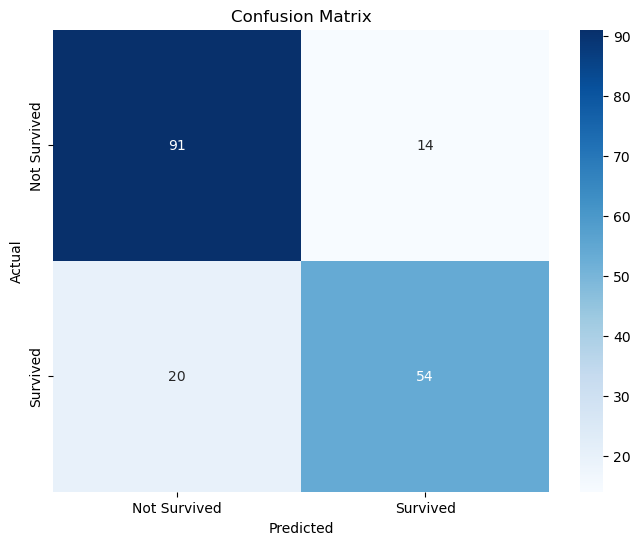

***************************************************
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features (X) and target (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

print("***************************************************")

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)

**Observation:-**

Overall, the model seems to perform reasonably well. It has a good balance of precision and recall for both classes, indicating that it's making accurate predictions for both survivors and non-survivors.

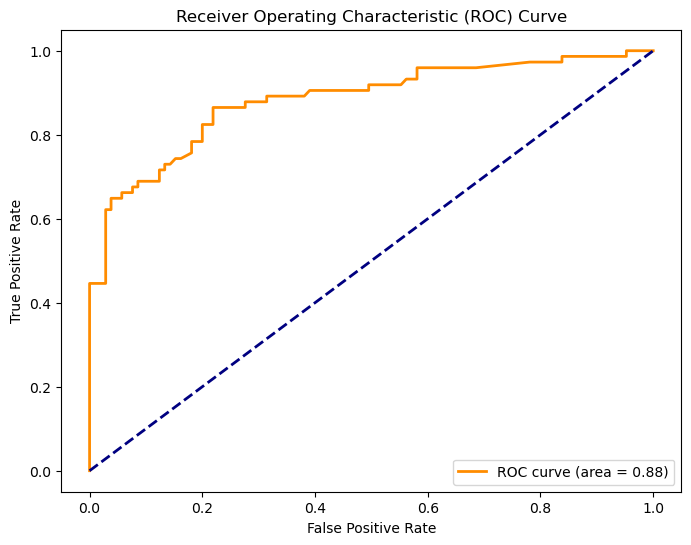

AUC: 0.88


In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print(f'AUC: {roc_auc:.2f}')


In the context of a binary classification problem like this, an AUC value close to 1 indicates that the model has a high ability to distinguish between the positive and negative classes.

AUC: 0.88 indicates that model is not overfitting

In [32]:
# Assuming you have already trained the model and have 'X_train' and 'y_train' data

# Get the coefficients
coefficients = model.coef_[0]

# Create a list of feature names
feature_names = list(X.columns)

# Combine feature names and their coefficients
feature_coefficients = list(zip(feature_names, coefficients))

# Sort the features by their absolute coefficients in descending order
feature_coefficients.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the top N important features (change N as per your preference)
top_features = feature_coefficients[:7]
print(top_features)


[('Sex', -1.2839502990967477), ('Pclass', -0.849296492991356), ('Age', -0.3714333104525812), ('SibSp', -0.30399458167219645), ('Embarked_S', -0.26293507942939137), ('Embarked_Q', -0.09884779610141944), ('Parch', -0.06786283750699018)]


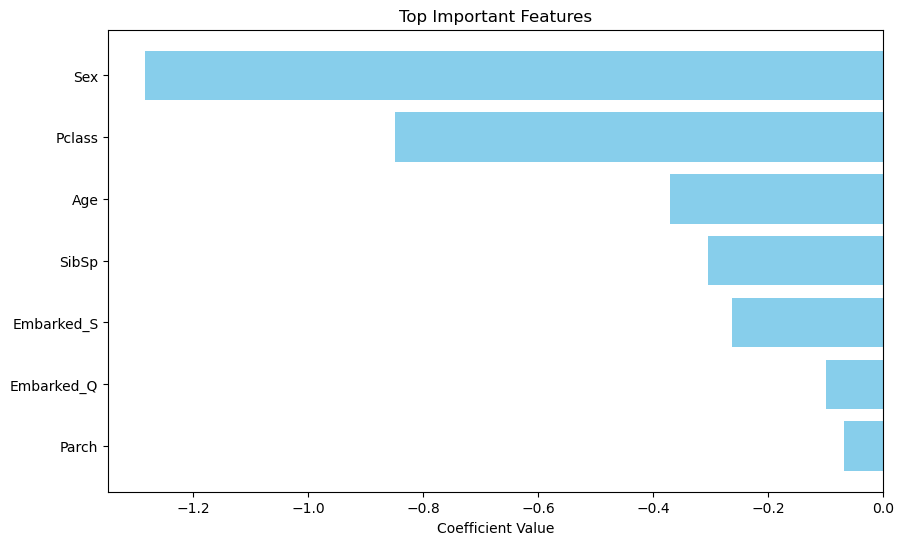

In [33]:
# Extract feature names and coefficients
features, coefficients = zip(*top_features)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top Important Features')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Observations and Conclusions

**1.Sex:** The coefficient for 'Sex' is approximately -1.28. This means that being female (encoded as 0) has a strong negative influence on the likelihood of survival. In this dataset, being female is associated with a higher chance of survival.

**2.Pclass (Passenger Class):** The coefficient for 'Pclass' is approximately -0.85. This indicates that higher class numbers (lower socio-economic status) are associated with a lower likelihood of survival. This suggests that passengers in higher classes had a better chance of survival.

**3.Age:** The coefficient for 'Age' is approximately -0.37. This suggests that as age increases, the likelihood of survival decreases. Older passengers were less likely to survive compared to younger ones.